#### HCMUS - Applied Mathematics and Statistics
#### Project 1: Color Compression
#### Student: Le Hoang Sang - 21127158
#### Class: 21CLC02

In [1]:
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np 
import time

In [2]:
def read_image():
    image_path = input("Enter image's name: ")
    try:
        image = PIL.Image.open(image_path)
        height, width = image.size
        image = np.array(image)
        image = image.reshape(-1, 3)
        return image_path, image, width, height
    except FileNotFoundError:
        print("Can not find this image")
    except:
        print("Error when open this image")

In [3]:
def display_image(image):
    plt.imshow(image)
    plt.show()

In [4]:
def ask_image_format():
    while True:
        user_input = input("Choose format (jpg/png): ").lower()
        if user_input == "jpg" or user_input == "png":
            return user_input
        else:
            print("Choose valid format (jpg/png).")

In [5]:
def save_image(rgb_array, image_path):
    image_path = image_path.split(".")[0] + "_compressed."

    image_format = ask_image_format()

    rgb_array = np.uint8(rgb_array)
    image = PIL.Image.fromarray(rgb_array)
    image.save(image_path + image_format)

In [6]:
def get_random_in_pixels(image, k):
    random_indexes = np.random.choice(len(image), size=k, replace=False)
    result = image[random_indexes]
    result = result.astype(np.ndarray)
    return result.astype(np.dtype('int_'))

#### K-means algorithm

In [7]:
def kmeans(image, k, num_iterations=100, init_centroids='random'):
    if(init_centroids == 'random'):
        centroids = np.random.randint(0, 256, size=(k, 3))
    elif(init_centroids == 'in_pixels'):
        centroids = get_random_in_pixels(image, k)
    else:
        print('init_centroids must be "random" or "in_pixels"')
        return

    for _ in range(num_iterations):
        distances = np.sum((image[:, np.newaxis] - centroids) ** 2, axis=2)
        print(distances)
        labels = np.argmin(distances, axis=1)

        old_centroids = np.copy(centroids)
        for i in range(k):
            cluster_pixels = image[labels == i]
            if len(cluster_pixels) > 0:
                centroids[i] = np.mean(cluster_pixels, axis=0)

        if np.allclose(old_centroids, centroids, atol=1, rtol=1):
            break

    return centroids, labels

In [8]:
def compress_handling(centers, labels, width, height):
    compressed_pixels = centers[labels]
    compressed_image = compressed_pixels.reshape((width, height, 3))
    
    return compressed_image

[[115394   2052   3646]
 [115394   2052   3646]
 [115394   2052   3646]
 ...
 [  5988  48266  41846]
 [  5988  48266  41846]
 [  5731  49029  42557]]
Time:  0.043203115463256836


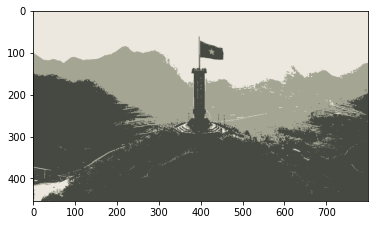

In [9]:
def main():
    image_path, image, width, height = read_image()

    start = time.time()
    centroids, labels = kmeans(image, 3, num_iterations = 100, init_centroids = 'in_pixels')
    new_image = compress_handling(centroids, labels, width, height)
    end = time.time()
    
    print("Time: ", end - start)

    display_image(new_image)
    save_image(new_image, image_path)

main()